Imports

In [3]:
pip install numpy
pip install pandas
pip install keras
pip install tensorflow
pip install seaborn



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np

In [18]:
df_test = pd.read_csv("/Users/anthonyivanier/Desktop/Ensae/3A/Advanced Machine Learning/Projet CNN/archive/sign_mnist_test/sign_mnist_test.csv")
df_train = pd.read_csv("/Users/anthonyivanier/Desktop/Ensae/3A/Advanced Machine Learning/Projet CNN/archive/sign_mnist_train/sign_mnist_train.csv")

Data

In [19]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
train_label=df_train['label']
train_label.head()
trainset=df_train.drop(['label'],axis=1)
trainset.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [21]:
X_train = trainset.values
X_train = trainset.values.reshape(-1,28,28,1)
print(X_train.shape)

(27455, 28, 28, 1)


In [23]:
test_label=df_test['label']
X_test=df_test.drop(['label'],axis=1)
print(X_test.shape)
X_test.head()

(7172, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [24]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y_train=lb.fit_transform(train_label)
y_test=lb.fit_transform(test_label)

In [25]:
X_test=X_test.values.reshape(-1,28,28,1)

In [26]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(27455, 28, 28, 1) (27455, 24) (7172, 28, 28, 1) (7172, 24)


# Data augmentation :

In [27]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 20,
                                  horizontal_flip=True)

X_test=X_test/255



'''
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 0,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

X_test=X_test/255
'''

"\ntrain_datagen = ImageDataGenerator(rescale = 1./255,\n                                  rotation_range = 0,\n                                  height_shift_range=0.2,\n                                  width_shift_range=0.2,\n                                  shear_range=0,\n                                  zoom_range=0.2,\n                                  horizontal_flip=True,\n                                  fill_mode='nearest')\n\nX_test=X_test/255\n"

Text(0.5, 1.0, 'label: 13  letter: M')

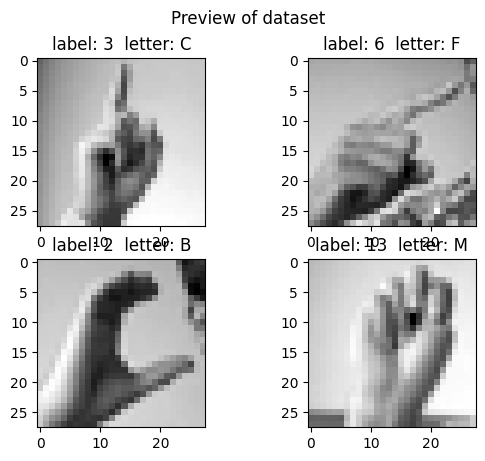

In [28]:
fig,axe=plt.subplots(2,2)
fig.suptitle('Preview of dataset')
axe[0,0].imshow(X_train[0].reshape(28,28),cmap='gray')
axe[0,0].set_title('label: 3  letter: C')
axe[0,1].imshow(X_train[1].reshape(28,28),cmap='gray')
axe[0,1].set_title('label: 6  letter: F')
axe[1,0].imshow(X_train[2].reshape(28,28),cmap='gray')
axe[1,0].set_title('label: 2  letter: B')
axe[1,1].imshow(X_train[4].reshape(28,28),cmap='gray')
axe[1,1].set_title('label: 13  letter: M')

CNN

In [40]:
# Define the model
model = Sequential()

# First block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))  
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third block
'''
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
'''

# Flattening
model.add(Flatten())

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(24, activation='sigmoid'))  

# Compile the model (assuming binary crossentropy and Adam optimizer)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_25 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 12, 12, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_16 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 8, 8, 64)          36928     
                                                      

In [42]:
model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 35,
          validation_data=(X_test,y_test),
          shuffle=1
         )

Epoch 1/35
138/138 [==============================] - 11s 75ms/step - loss: 0.2374 - accuracy: 0.0406 - val_loss: 0.1829 - val_accuracy: 0.0224
Epoch 2/35
138/138 [==============================] - 10s 76ms/step - loss: 0.1864 - accuracy: 0.0439 - val_loss: 0.1766 - val_accuracy: 0.0651
Epoch 3/35
138/138 [==============================] - 11s 77ms/step - loss: 0.1733 - accuracy: 0.0970 - val_loss: 0.1460 - val_accuracy: 0.2054
Epoch 4/35
138/138 [==============================] - 11s 76ms/step - loss: 0.1444 - accuracy: 0.2308 - val_loss: 0.1086 - val_accuracy: 0.4584
Epoch 5/35
138/138 [==============================] - 11s 77ms/step - loss: 0.1148 - accuracy: 0.3985 - val_loss: 0.0777 - val_accuracy: 0.6011
Epoch 6/35
138/138 [==============================] - 11s 78ms/step - loss: 0.0903 - accuracy: 0.5411 - val_loss: 0.0577 - val_accuracy: 0.6963
Epoch 7/35
138/138 [==============================] - 11s 79ms/step - loss: 0.0730 - accuracy: 0.6385 - val_loss: 0.0473 - val_accuracy:

Epoch 1/35
138/138 [==============================] - 11s 76ms/step - loss: 0.0087 - accuracy: 0.9703 - val_loss: 0.0031 - val_accuracy: 0.9894
Epoch 2/35
138/138 [==============================] - 10s 75ms/step - loss: 0.0088 - accuracy: 0.9700 - val_loss: 0.0031 - val_accuracy: 0.9897
Epoch 3/35
138/138 [==============================] - 10s 76ms/step - loss: 0.0082 - accuracy: 0.9712 - val_loss: 0.0028 - val_accuracy: 0.9873
Epoch 4/35
138/138 [==============================] - 11s 76ms/step - loss: 0.0081 - accuracy: 0.9730 - val_loss: 0.0028 - val_accuracy: 0.9886
Epoch 5/35
138/138 [==============================] - 11s 77ms/step - loss: 0.0084 - accuracy: 0.9712 - val_loss: 0.0027 - val_accuracy: 0.9879
Epoch 6/35
138/138 [==============================] - 11s 78ms/step - loss: 0.0075 - accuracy: 0.9742 - val_loss: 0.0029 - val_accuracy: 0.9883
Epoch 7/35
138/138 [==============================] - 11s 80ms/step - loss: 0.0075 - accuracy: 0.9750 - val_loss: 0.0027 - val_accuracy:

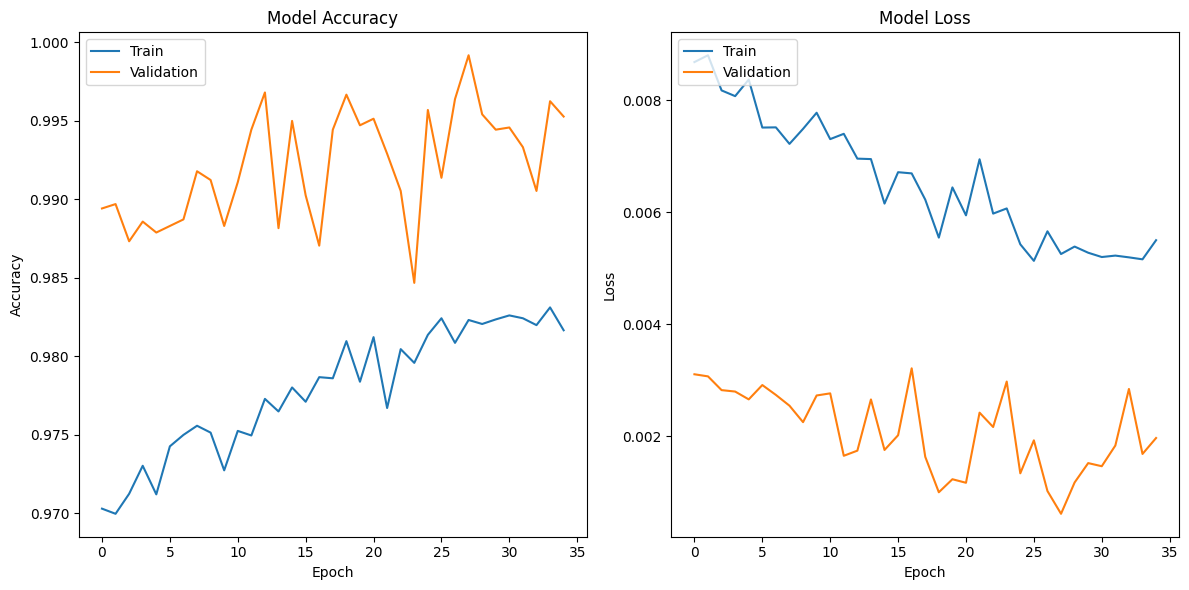

In [45]:
# Assuming 'history' is the output from the model.fit() call
history = model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 35,
          validation_data=(X_test,y_test),
          shuffle=1
         )

# Summarize history for accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot = accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Summarize history for loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot = loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()